TrainTonnage Anomaly detection notebook

https://github.com/tosin2013/opcua-asyncio-build-pipelines/blob/main/docs/railroad-mocker.md

https://github.com/tosin2013/edge-anomaly-detection

# Step 1: Install necessary libraries

In [1]:
!pip install pandas scikit-learn matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# Step 2: Import libraries

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 3: Load the data

In [4]:
local_dest_dir = os.path.join(os.getcwd(), 'clean_datasets/')
output_file_path = local_dest_dir + 'edge-datalake-bullet-clean.json'
df = pd.read_json(output_file_path)

# Step 4: Data Exploration

In [8]:

df

,ElapsedTime,TrainSpeed,TrainAcceleration,TrainBraking,OutsideTemperature,Humidity,WindSpeed,PrimarySuspensionStiffness,SecondarySuspensionStiffness,DampingRate,TrainTonnage
0,2023-10-06T05:39:52.012591Z,78.116094,-0.597256,0,25,70,15,20235.488272,10117.744136,1023.548827,1081.915002
1,2023-10-06T05:39:53.055930Z,79.116094,1.000000,0,25,70,15,20110.488272,10055.244136,1011.048827,1081.915002
2,2023-10-06T05:39:54.098332Z,80.000000,1.000000,0,25,70,15,20000.000000,10000.000000,1000.000000,1081.915002
3,2023-10-06T05:39:55.140907Z,79.160007,-0.839993,0,25,70,15,20104.999121,10052.499561,1010.499912,1081.915002
4,2023-10-06T05:39:56.185652Z,80.000000,1.000000,0,25,70,15,20000.000000,10000.000000,1000.000000,1081.915002
...,...,...,...,...,...,...,...,...,...,...,...
295,2023-10-06T05:38:54.343959Z,77.050627,-0.802559,0,25,70,15,20368.671641,10184.335821,1036.867164,1081.915002
296,2023-10-06T05:38:55.386600Z,77.022677,-0.027950,0,25,70,15,20372.165379,10186.082689,1037.216538,1081.915002
297,2023-10-06T05:38:56.430946Z,78.022677,1.000000,0,25,70,15,20247.165379,10123.582689,1024.716538,1081.915002
298,2023-10-06T05:38:57.476005Z,78.145864,0.123187,0,25,70,15,20231.766944,10115.883472,1023.176694,1081.915002


# Step 5: Preprocess the data (remove rows with missing values)

In [31]:
df.TrainTonnage

0      1081.915002
1      1081.915002
2      1081.915002
3      1081.915002
4      1081.915002
          ...     
295    1081.915002
296    1081.915002
297    1081.915002
298    1081.915002
299    1081.915002
Name: TrainTonnage, Length: 300, dtype: float64

# Step 6: Make an Isolation Forest Model

In [33]:
from sklearn.ensemble import IsolationForest

# Anomaly detection using Isolation Forest
clf = IsolationForest(contamination=0.1)  # contamination is the proportion of outliers in the data
df['anomaly'] = clf.fit_predict(df.iloc[:, 1:])


/opt/app-root/lib64/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,ElapsedTime,TrainSpeed,TrainAcceleration,TrainBraking,OutsideTemperature,Humidity,WindSpeed,PrimarySuspensionStiffness,SecondarySuspensionStiffness,DampingRate,TrainTonnage,anomaly
25,2023-10-06T05:40:18.294056Z,78.241578,0.750866,0,25,70,15,20219.802695,10109.901348,1021.980270,1081.915002,-1
51,2023-10-06T05:39:00.616019Z,77.485777,-1.000000,0,25,70,15,20314.277856,10157.138928,1031.427786,1081.915002,-1
74,2023-10-06T05:39:24.657908Z,79.932020,0.474186,0,25,70,15,20008.497473,10004.248736,1000.849747,1081.915002,-1
80,2023-10-06T05:39:30.946968Z,77.346883,-0.639819,0,25,70,15,20331.639608,10165.819804,1033.163961,1081.915002,-1
119,2023-10-06T05:37:34.812338Z,79.566588,-0.433412,0,25,70,15,20054.176471,10027.088236,1005.417647,878.031100,-1
132,2023-10-06T05:37:48.383972Z,79.677019,0.522453,0,25,70,15,20040.372665,10020.186333,1004.037267,878.031100,-1
155,2023-10-06T05:35:35.738787Z,79.886104,0.744950,0,25,70,15,20014.237057,10007.118528,1001.423706,878.031100,-1
163,2023-10-06T05:35:44.080946Z,77.574016,-0.671092,0,25,70,15,20303.247974,10151.623987,1030.324797,878.031100,-1
164,2023-10-06T05:35:45.126422Z,78.290578,0.716562,0,25,70,15,20213.677744,10106.838872,1021.367774,878.031100,-1
167,2023-10-06T05:35:48.256649Z,77.668506,-0.900806,0,25,70,15,20291.436710,10145.718355,1029.143671,878.031100,-1


## Show Anomalies

In [34]:

# Print rows which are anomalies
anomalies = df[df['anomaly'] == -1]


anomalies


,ElapsedTime,TrainSpeed,TrainAcceleration,TrainBraking,OutsideTemperature,Humidity,WindSpeed,PrimarySuspensionStiffness,SecondarySuspensionStiffness,DampingRate,TrainTonnage,anomaly
25,2023-10-06T05:40:18.294056Z,78.241578,0.750866,0,25,70,15,20219.802695,10109.901348,1021.980270,1081.915002,-1
51,2023-10-06T05:39:00.616019Z,77.485777,-1.000000,0,25,70,15,20314.277856,10157.138928,1031.427786,1081.915002,-1
74,2023-10-06T05:39:24.657908Z,79.932020,0.474186,0,25,70,15,20008.497473,10004.248736,1000.849747,1081.915002,-1
80,2023-10-06T05:39:30.946968Z,77.346883,-0.639819,0,25,70,15,20331.639608,10165.819804,1033.163961,1081.915002,-1
119,2023-10-06T05:37:34.812338Z,79.566588,-0.433412,0,25,70,15,20054.176471,10027.088236,1005.417647,878.031100,-1
132,2023-10-06T05:37:48.383972Z,79.677019,0.522453,0,25,70,15,20040.372665,10020.186333,1004.037267,878.031100,-1
155,2023-10-06T05:35:35.738787Z,79.886104,0.744950,0,25,70,15,20014.237057,10007.118528,1001.423706,878.031100,-1
163,2023-10-06T05:35:44.080946Z,77.574016,-0.671092,0,25,70,15,20303.247974,10151.623987,1030.324797,878.031100,-1
164,2023-10-06T05:35:45.126422Z,78.290578,0.716562,0,25,70,15,20213.677744,10106.838872,1021.367774,878.031100,-1
167,2023-10-06T05:35:48.256649Z,77.668506,-0.900806,0,25,70,15,20291.436710,10145.718355,1029.143671,878.031100,-1


In [30]:
correlation_matrix = df.corr()
print(correlation_matrix)

                              TrainSpeed  TrainAcceleration  TrainBraking  \
TrainSpeed                      1.000000           0.515557           NaN   
TrainAcceleration               0.515557           1.000000           NaN   
TrainBraking                         NaN                NaN           NaN   
OutsideTemperature                   NaN                NaN           NaN   
Humidity                             NaN                NaN           NaN   
WindSpeed                            NaN                NaN           NaN   
PrimarySuspensionStiffness     -1.000000          -0.515557           NaN   
SecondarySuspensionStiffness   -1.000000          -0.515557           NaN   
DampingRate                    -1.000000          -0.515557           NaN   
TrainTonnage                    0.015104           0.000627           NaN   
anomaly                         0.266365           0.023885           NaN   

                              OutsideTemperature  Humidity  WindSpeed  \
Tr

/tmp/ipykernel_374/2020863294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


ElapsedTime
TrainSpeed
TrainAcceleration
TrainBraking
OutsideTemperature
Humidity
WindSpeed
PrimarySuspensionStiffness
SecondarySuspensionStiffness
DampingRate
TrainTonnage
anomaly


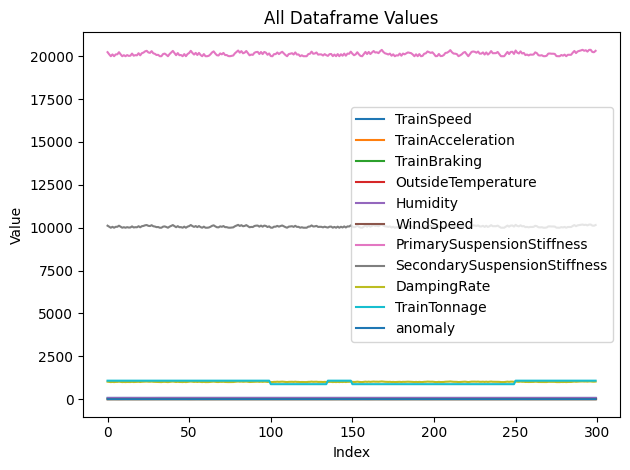

In [25]:
# Plot all columns
for column in df.columns:
    print(column)

    if column != 'ElapsedTime':
        df[column].plot(label=column)

plt.title("All Dataframe Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

ElapsedTime
TrainSpeed
TrainAcceleration
TrainBraking
OutsideTemperature
Humidity
WindSpeed
PrimarySuspensionStiffness
SecondarySuspensionStiffness
DampingRate
TrainTonnage
anomaly


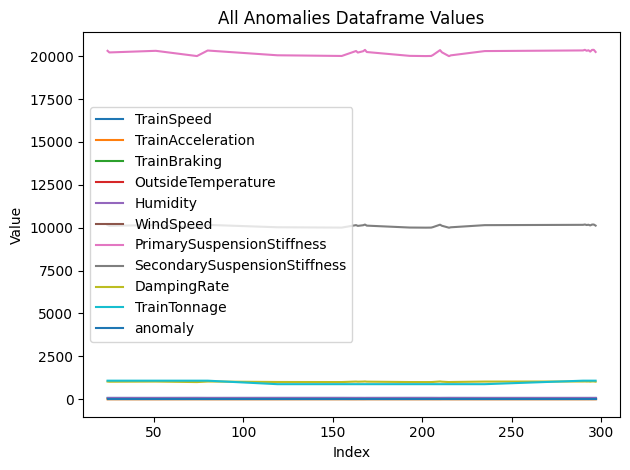

In [26]:
# Plot all columns
for column in anomalies.columns:
    print(column)

    if column != 'ElapsedTime':
        anomalies[column].plot(label=column)

plt.title("All Anomalies Dataframe Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

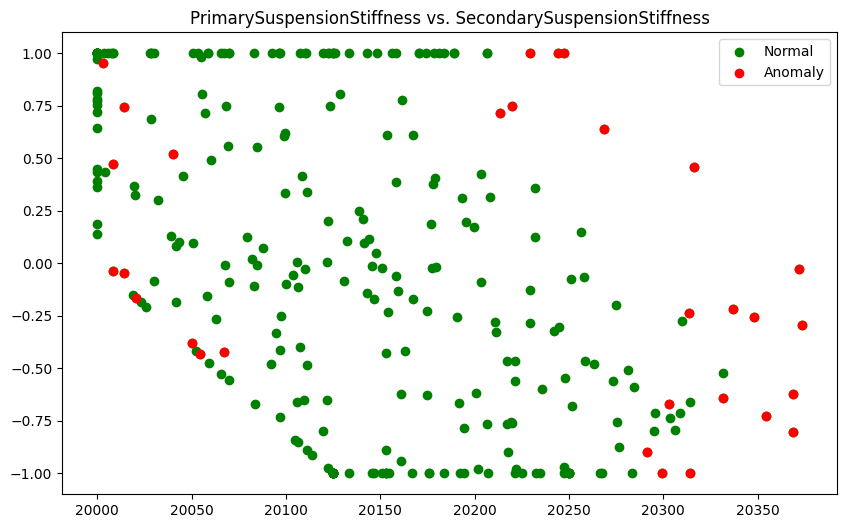

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PrimarySuspensionStiffness'], df['TrainAcceleration'],  color='green', label='Normal')
plt.scatter(anomalies['PrimarySuspensionStiffness'], anomalies['TrainAcceleration'], color='red', label='Anomaly')
plt.title("PrimarySuspensionStiffness vs. TrainAcceleration")
plt.legend()
plt.show()


# This is where I stopped :)

## TODO: Save model
## TODO: Load model
## TODO: test loaded model against sample data
## TODO: (optional?) convert to ONNX 

In [198]:
# Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 8: Evaluate the initial model

In [199]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [200]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error

In [201]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.0


# Step 9: Create visualizations of the initial data and model

## Scatter plot

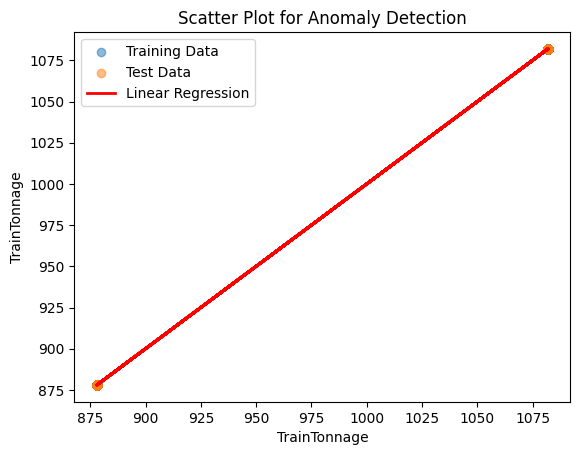

In [202]:
# Create a scatter plot of the data
plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('TrainTonnage')
plt.ylabel('TrainTonnage')
plt.legend()
plt.title('Scatter Plot for Anomaly Detection')
plt.show()

## Residual plot

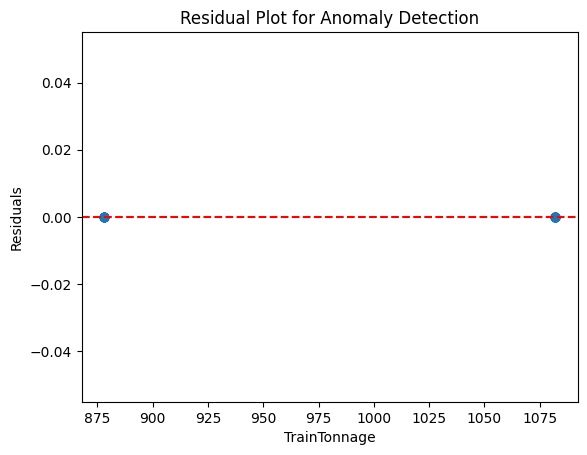

In [203]:
# Create a residual plot
residuals = y_test - y_pred
plt.scatter(X_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TrainTonnage')
plt.ylabel('Residuals')
plt.title('Residual Plot for Anomaly Detection')
plt.show()


## Histogram of residuals and  Box plot of residuals

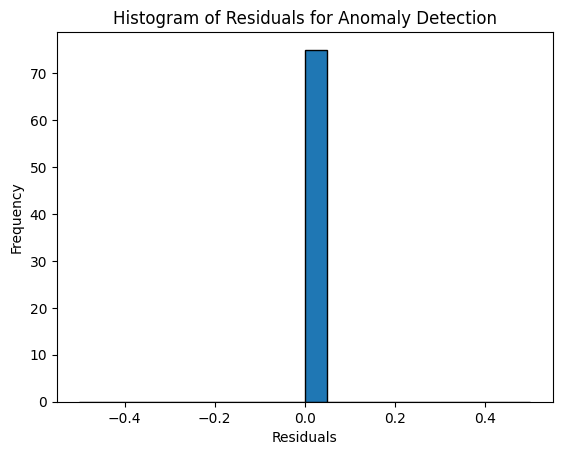

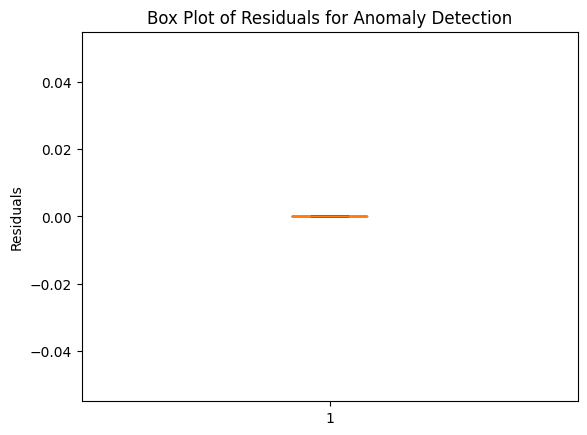

In [204]:
# Create a histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Anomaly Detection')
plt.show()

# Create a box plot of residuals
plt.boxplot(residuals)
plt.ylabel('Residuals')
plt.title('Box Plot of Residuals for Anomaly Detection')
plt.show()


# Step 10: Inject anomalies into the data

## Add an outlier to the dataset

In [205]:
# Add an outlier to the dataset
outlier = pd.DataFrame({'TrainTonnage': [1000], 'TrainTonnage': [1000]})
df = df.append(outlier, ignore_index=True)


/tmp/ipykernel_1620/2269059117.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(outlier, ignore_index=True)


## Generate synthetic anomalies

In [206]:
# Generate synthetic anomalies
num_anomalies = 10 # Change these values to update the graphs below 
synthetic_anomalies = pd.DataFrame({'TrainTonnage': np.random.normal(5000, 1000, num_anomalies)})
df = df.append(synthetic_anomalies, ignore_index=True)

/tmp/ipykernel_1620/2052523793.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_anomalies, ignore_index=True)


## Modify an existing data point to create an anomaly

In [207]:
# Modify existing data points to create anomalies
df.loc[df.index == 5, 'TrainTonnage'] = 10000  # Modify the 6th data point to be an anomaly
#df.loc[df.index == 100, 'TrainTonnage'] = 99999  # Modify the 6th data point to be an anomaly
#df.loc[df.index == 200, 'TrainTonnage'] = 102  # Modify the 6th data point to be an anomaly


# Step 11: Preprocess the data with anomalies

In [208]:
# Step 11: Preprocess the data with anomalies
df = df.dropna()

# Step 12: Split the dataset again after introducing anomalies

In [209]:
# Instantiate the random forest regressor
X = df[['TrainTonnage']]
y = df['TrainTonnage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Step 13: Retrain the model after introducing anomalies

In [210]:
# Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 14: Evaluate the model with anomalies

In [211]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [212]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("\nStep 14: Model Evaluation with Anomalies")
print('Mean squared error:', mse)


Step 14: Model Evaluation with Anomalies
Mean squared error: 0.0


# Step 15: Create visualizations of the data and model with anomalies

## Scatter plot

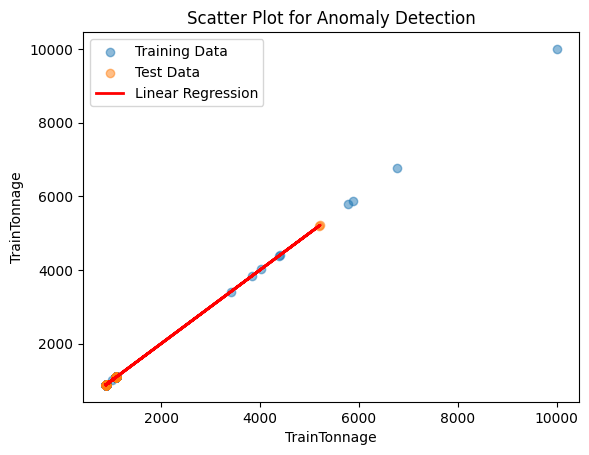

In [213]:
# Create a scatter plot of the data
plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('TrainTonnage')
plt.ylabel('TrainTonnage')
plt.legend()
plt.title('Scatter Plot for Anomaly Detection')
plt.show()


## Residual plot

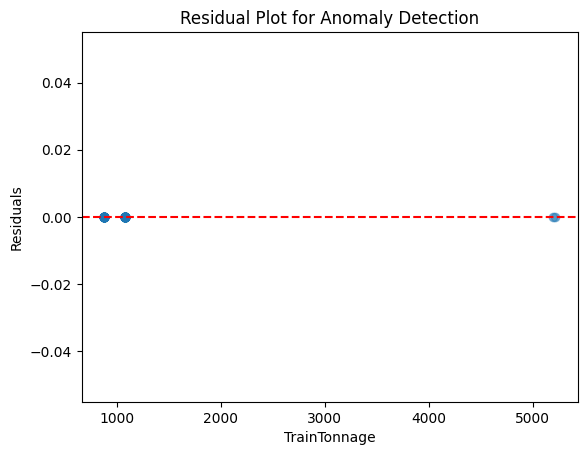

In [214]:
# Create a residual plot
residuals = y_test - y_pred
plt.scatter(X_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TrainTonnage')
plt.ylabel('Residuals')
plt.title('Residual Plot for Anomaly Detection')
plt.show()


## Histogram of residuals and  Box plot of residuals

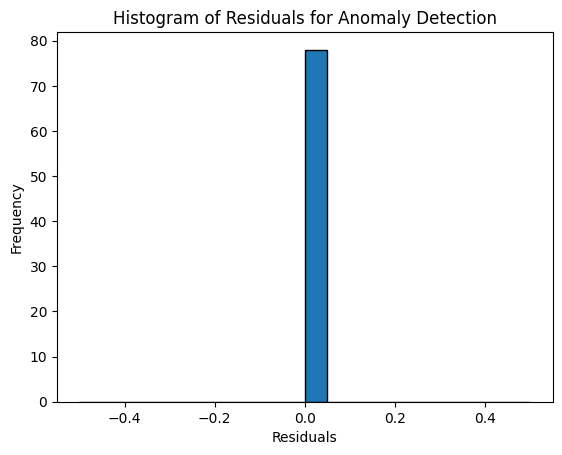

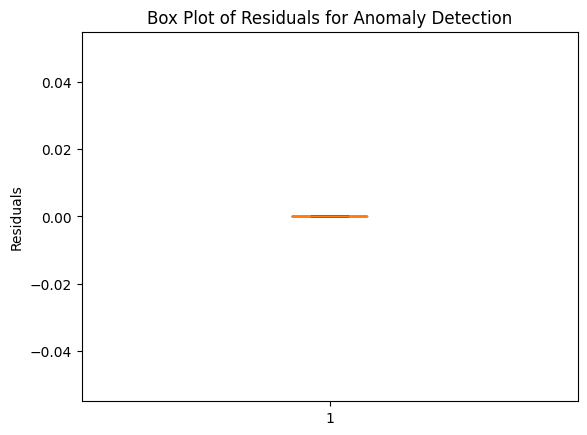

In [215]:
# Create a histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Anomaly Detection')
plt.show()

# Create a box plot of residuals
plt.boxplot(residuals)
plt.ylabel('Residuals')
plt.title('Box Plot of Residuals for Anomaly Detection')
plt.show()